In [ ]:
from math import *
import sys
import random
 

class P(): #point
    def __init__(self,x,y):
        self.x = x
        self.y = y
 
    def transform(self,x,y):
        self.x = self.x+x
        self.y = self.y+y
 
    def rotate(self,angle):
        x = self.x
        y = self.y
        self.x = x*cos(angle*pi/180)-y*sin(angle*pi/180)
        self.y = x*sin(angle*pi/180)+y*cos(angle*pi/180)
 
 
class L(): #line
    def __init__(self,p1,p2,r1,r2):
        self.a = 2*(p2.x-p1.x)
        self.b = 2*(p2.y-p1.y)
        self.c = p1.x*p1.x - p2.x*p2.x +p1.y*p1.y - p2.y*p2.y - r2*r2 + r1*r1
 
 
class O(): #circle
    def __init__(self,p1,r):
        self.x = p1.x
        self.y = p1.y
        self.r = r
 
 
def euclid(a, b):
    return sqrt((a.x-b.x)**2+(a.y-b.y)**2)
 
def cross(a, b):
    return a.x*b.y - a.y*b.x
 
def dot(a, b):
    return a.x*b.x + a.y*b.y

def vect(a, b):
    return P(b.x-a.x,b.y-a.y)

def get_angle_point(o, l):
    l.c =  l.a * o.x + l.b*o.y + l.c
    x = -l.a * l.c / (l.a**2 + l.b**2)
    y = -l.b * l.c / (l.a**2 + l.b**2)
    d = o.r**2 - l.c*l.c / (l.a**2 + l.b**2)
    mult = sqrt (d / (l.a**2 + l.b**2))
    p1 = P(x + l.b * mult + o.x, y - l.a * mult + o.y)
    p2 = P(x - l.b * mult + o.x, y + l.a * mult + o.y)
    return p1, p2
 
def is_90(corners):
    EPS = 0.000001
    v1 = vect(corners[0], corners[1])
    v2 = vect(corners[1], corners[2])
    ang = degrees(atan2(cross(v1, v2), dot(v1, v2)))
    if ang < 90.0 + EPS and ang > 90.0 - EPS:
        return True
    return False

def get_corner(p1, p2):
    inp1 = query(p1)
    dist1 = float(inp1[1])
    o = O(p1, dist1)
    inp2 = query(p2)
    dist2 = float(inp2[1])
    l = L(p2, p1, dist1, dist2)
    p_1, p_2 = get_angle_point(o, l)
    return p_1, p_2
 
def lab_angle():
    corners =[P(1,1),P(2,1),P(1,2)]
    K = 10**4-10
    while(not is_90(corners)):
        r_angle = random.uniform(1,2)*pi/2
        for i in range(3):
            quatr = pi*i/2
            p1 = P(K*cos(r_angle+quatr),K*sin(r_angle+quatr))
            p2 = P(K*cos(r_angle+quatr+0.02),K*sin(r_angle+quatr+0.02))
            corn1, corn2 = get_corner(p1,p2)
            corners[i] = corn1 if euclid(corn1,P(0,0))<euclid(corn2,P(0,0)) else corn2
    a,b,c = corners[0],corners[1],corners[2]
    v = P(0, 1)
    v2 = 0  
    # get transform_point and_rotate angle
    l1, l2, l3 = euclid(corners[0],corners[2]), euclid(corners[1],corners[2]), euclid(corners[0],corners[1])
    if l1 > l2 and l1 > l3:
        v2 = vect(corners[1],corners[2])
        if degrees(atan2(cross(v, v2), dot(v, v2)))>0:
            point_zero = corners[1]
        else:
            point_zero = corners[1]
            v2 = vect(corners[1],corners[0])
    elif l2 > l1 and l2 > l3:
        point_zero = corners[2]
        v2 = vect(corners[1],corners[2])
    else:
        point_zero = corners[2]
        v2 = vect(corners[2],corners[0])
    angle = degrees(atan2(cross(v, v2), dot(v, v2)))
    return point_zero, angle, corners


def search_inside(M,N):
    point,angle,corners = lab_angle()
    x,y = point.x,point.y
    T = max(M,N)
    for i in range(T):
        for j in range(T):
            p1 = P(5 + 10*j,5+10*i)
            p1.rotate(angle)
            p1.transform(x,y)
            inp1 = query(p1)
            if inp1[0] == "outside" or inp1[0] == "blocked":
                continue
            dist1 = float(inp1[1])
            if dist1 < 5*sqrt(2):
                p2 = P(p1.x+1.45,p1.y+2.2)
                rez1, rez2 = get_corner(p1, p2)
                inp1 = query(rez1)
                inp2 = query(rez2)
                if str(inp1[0]) == "inside":
                    if str(inp2[0]) == "inside":
                        if float(inp1[1]) < float(inp2[1]):
                            if round(float(inp1[1])) ==0: 
                                query(rez1, True)
                                return
                        else:
                            if round(float(inp2[1])) == 0: 
                                query(rez2, True)
                                return
                    else:
                        if round(float(inp1[1])) == 0:
                            query(rez1, True)
                            return
                elif str(inp2[0]) == "inside":
                    if round(float(inp2[1])) == 0:
                        query(rez2, True)
                        return
 
 
def query(p, last=False):
    if not last:
        print("activate {} {}".format(p.x, p.y))
    else:
        print("found {} {}".format(round(p.x), round(p.y)))
    sys.stdout.flush()
    return input().strip().split()
 

if __name__ == "__main__":
    M, N = map(int, input().strip().split())
    search_inside(M, N)

3  4
activate -1149.9892212273623 9923.589309874773


In [157]:
from math import *
import sys 
import random

def in_(p1,p2,p3):
    if cross2(sub(p1,p2),sub(p3,p1)) <= 0:
        return True
    return False

def sub(x, y):
    return list(map(lambda a, b: a - b, x, y))

def cross2(a,b):
    return a[0]*b[1]-a[1]*b[0]

def checkEqual(array):
    return len(set(array)) <= 1    

def GetDistanceBetweenPoints(x1, y1, x2, y2):
    return sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))

def IsObtuseAngle(oppositeLine, a, b):
    cos = (a*a + b*b - oppositeLine*oppositeLine) / (2 * a * b)
    return cos < 0
 
def GetDistanceToSegment(ax, ay, bx, by, x, y):
    if ((ax == x and ay == y) or (bx == x and by == y)):
        return 0
    AB = GetDistanceBetweenPoints(ax, ay, bx, by)
    AC = GetDistanceBetweenPoints(ax, ay, x, y)
    if (AB == 0):
        return AC
    BC = GetDistanceBetweenPoints(bx, by, x, y)
    if (IsObtuseAngle(AC, BC, AB)):
        return BC
    if (IsObtuseAngle(BC, AC, AB)):
        return AC
    p = (AC + BC + AB) / 2
    return 2 * sqrt(p * (p - AB) * (p - BC) * (p - AC)) / AB
        

class P(): #point
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def transform(self,x,y):
        self.x = self.x+x
        self.y = self.y+y
        
    def rotate(self,angle):
        x = self.x
        y = self.y
        self.x = x*cos(angle*pi/180)-y*sin(angle*pi/180)
        self.y = x*sin(angle*pi/180)+y*cos(angle*pi/180)

class L(): #line
    def __init__(self,p1,p2,r1,r2):
        self.a = 2*(p2.x-p1.x)
        self.b = 2*(p2.y-p1.y)
        self.c = p1.x*p1.x - p2.x*p2.x +p1.y*p1.y - p2.y*p2.y - r2*r2 + r1*r1
        
class O(): #circle
    def __init__(self,p1,r):
        self.x = p1.x
        self.y = p1.y
        self.r = r

def euclid(a,b):
    return sqrt((a.x-b.x)**2+(a.y-b.y)**2)

def cross(a,b):
    return a.x*b.y - a.y*b.x

def dot(a,b):
    return a.x*b.x + a.y*b.y

def vect(a,b):
    return P(b.x-a.x,b.y-a.y)

def get_angle_point(o, l):
    l.c =  l.a * o.x + l.b*o.y + l.c
    x = -l.a * l.c / (l.a**2 + l.b**2)
    y = -l.b * l.c / (l.a**2 + l.b**2)
    
    d = o.r**2 - l.c*l.c / (l.a**2 + l.b**2)
    mult = sqrt (d / (l.a**2 + l.b**2))
    p1 = P(x + l.b * mult + o.x, y - l.a * mult + o.y)
    p2 = P(x - l.b * mult + o.x, y + l.a * mult + o.y)
    return p1,p2

def is_90(corners):
    EPS = 0.00000001
    v1 = vect(corners[0],corners[1])
    v2 = vect(corners[1],corners[2])
    ang = degrees(atan2(cross(v1,v2), dot(v1,v2)))
    if ang < 90.0 + EPS and ang > 90.0 -EPS:
        return True
    return False

def get_corner(p1,p2):
    inp1 = query(p1)        #query 1
    dist1 = float(inp1[1])
    o = O(p1,dist1)
    inp2 = query(p2)          #query 2
    dist2 = float(inp2[1])
    l = L(p2,p1,dist1,dist2)
    p_1,p_2 = get_angle_point(o,l)
    return p_1,p_2
    
def search_inside(M,N):
    point,angle,corners = lab_angle()
    x,y = point.x,point.y
    T = max(M,N)
    for i in range(T):
        for j in range(T):
            p1 = P(5 + 10*j,5+10*i)
            p1.rotate(angle)
            p1.transform(x,y)
            inp1 = query(p1)
            if inp1[0] == "outside" or inp1[0] == "blocked":
                print('yps')
                continue
            dist1 = float(inp1[1])
            if dist1 < 5*sqrt(2):
                p2 = P(p1.x+1.45,p1.y+2.2)
                rez1, rez2 = get_corner(p1, p2)
                inp1 = query(rez1)
                inp2 = query(rez2)
                if str(inp1[0]) == "inside":
                    if str(inp2[0]) == "inside":
                        if float(inp1[1]) < float(inp2[1]):
                            if round(float(inp1[1])) ==0: 
                                query(rez1, True)
                                return
                        else:
                            if round(float(inp2[1])) == 0: 
                                query(rez2, True)
                                return
                    else:
                        if round(float(inp1[1])) == 0:
                            query(rez1, True)
                            return
                elif str(inp2[0]) == "inside":
                    if round(float(inp2[1])) == 0:
                        query(rez2, True)
                        return

        
def query(p,last=False):
    if not last:
        print("activate {} {}".format(p.x,p.y))
    else:
        print("found {} {}".format(round(p.x),round(p.y)))
        sys.stdout.flush()
        print("OK")
        return
    sys.stdout.flush()
    c, tr = check(p.x,p.y)
    if c:
        in_or_not = "inside"
        res = testing(p,tr,True)
    else:
        in_or_not = "outside"
        res = testing(p,tr)
    inp = [in_or_not,res,"active"]   #input().split()
    print(inp)
    return inp

def issledovatel(corners):
    return

def lab_angle():
    corners =[P(1,1),P(2,1),P(1,2)]
    K = 10**4-10
    while(not is_90(corners)):
        r_angle = random.uniform(1,2)*pi/2
        for i in range(3):
            quatr = pi*i/2
            p1 = P(K*cos(r_angle+quatr),K*sin(r_angle+quatr))
            p2 = P(K*cos(r_angle+quatr+0.02),K*sin(r_angle+quatr+0.02))
            corn1, corn2 = get_corner(p1,p2)
            corners[i] = corn1 if euclid(corn1,P(0,0))<euclid(corn2,P(0,0)) else corn2
    a,b,c = corners[0],corners[1],corners[2]
    for cor in corners:
        print(cor.x,cor.y)
    v = P(0, 1)
    v2 = 0  
    # get transform_point and_rotate angle
    l1, l2, l3 = euclid(corners[0],corners[2]), euclid(corners[1],corners[2]), euclid(corners[0],corners[1])
    if l1 > l2 and l1 > l3:
        v2 = vect(corners[1],corners[2])
        if degrees(atan2(cross(v, v2), dot(v, v2)))>0:
            point_zero = corners[1]
        else:
            point_zero = corners[1]
            v2 = vect(corners[1],corners[0])
    elif l2 > l1 and l2 > l3:
        point_zero = corners[2]
        v2 = vect(corners[1],corners[2])
    else:
        point_zero = corners[2]
        v2 = vect(corners[2],corners[0])
    angle = degrees(atan2(cross(v, v2), dot(v, v2)))
    return point_zero, angle, corners

def check(x,y):
    xy=[x,y]
    in_tr = [0 for i in range(4)]
    tr = [[0,0],[10,0],[10,10],[0,10]]
    #tr = [[4400, -20],[4410.0,-37.32050807568877],[4435.980762113533,-22.32050807568877],[4425.980762113533, -5.000000000000002]]
    #tr = [[-4400, -20],[-4410.0,-37.32050807568877],[-4435.980762113533,-22.32050807568877],[-4425.980762113533, -5.000000000000002]]
    for i in range(4):
        in_tr[i] = in_(tr[i],tr[(i+1)%4],xy)
    if checkEqual(in_tr):
        return True,tr
    else:
        return False, tr 

def testing(p, tr, inside=False):
    if not inside:
        dist =[10**9 for i in range(4)]
        a = [0 for i in range(4)]
        a[0] = [tr[0],tr[1]]
        a[1] = [tr[1],tr[2]]
        a[2] = [tr[2],tr[3]]
        a[3] = [tr[3],tr[0]]
        for i in range(4):
            dist[i] = GetDistanceToSegment(a[i][0][0], a[i][0][1], a[i][1][0], a[i][1][1],p.x,p.y)
        return min(dist)
    else:
        tr = P(3,6)
        #tr = P(4425, 26)
        return euclid(tr,p)
    
if __name__ == "__main__":
    M, N = 2,3
    search_inside(M,N)                 

activate -8189.481530212888 5721.231708845742
['outside', 9984.276406721876, 'active']
activate -8302.260694523195 5556.308789131074
['outside', 9984.441588001673, 'active']
activate -5721.231708845747 -8189.4815302128845
['outside', 9990.0, 'active']
activate -5556.308789131082 -8302.260694523191
['outside', 9990.0, 'active']
activate 8189.4815302128845 -5721.231708845747
['outside', 9981.803963682903, 'active']
activate 8302.26069452319 -5556.308789131083
['outside', 9981.690978291681, 'active']
-7.275957614183426e-12 9.999999999990905
6.093614501878619e-11 -4.092726157978177e-11
9.999999999986358 -2.091837814077735e-11
9.999999999925421 2.000888343900442e-11
vect -6.821210263296962e-11 10.000000000031832
sho t ne tak
3.9082655925699283e-10
6.093614501878619e-11 -4.092726157978177e-11
activate 5.00000000002683 4.999999999993179
['inside', 2.236067977526838, 'active']
activate 5.00000000002683 4.999999999993179
['inside', 2.236067977526838, 'active']
activate 6.45000000002683 7.199999

-30.000000000000004
[<__main__.P object at 0x0000026613E4A6D8>, <__main__.P object at 0x0000026613E4AEB8>, <__main__.P object at 0x0000026613E4A9B0>, <__main__.P object at 0x0000026613E4A128>, <__main__.P object at 0x0000026613E4ACF8>, <__main__.P object at 0x0000026613E4AF28>, <__main__.P object at 0x0000026613E4A748>, <__main__.P object at 0x0000026613E4AC88>, <__main__.P object at 0x0000026613E4AE80>]


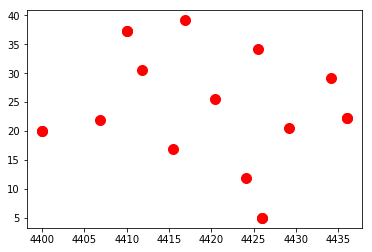

In [135]:
import matplotlib.pyplot as plt

def euclid(a,b):
    return sqrt((a.x-b.x)**2+(a.y-b.y)**2)

def cross(a,b):
    return a.x*b.y - a.y*b.x

def dot(a,b):
    return a.x*b.x + a.y*b.y

def vect(a,b):
    return P(b.x-a.x,b.y-a.y) 

class P(): #point
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def transform(self,x,y):
        self.x = self.x+x
        self.y = self.y+y
        
    def rotate(self,angle):
        x = self.x
        y = self.y
        self.x = x*cos(angle*pi/180)-y*sin(angle*pi/180)
        self.y = x*sin(angle*pi/180)+y*cos(angle*pi/180)
    
points = [P(0,0),P(0,20),P(30,20),P(30,0)]

p1 = [0 for i in range(9)]
v = P(0, 1)
v2 = vect(P(4400, 20),P(4410.0,37.32050807568877))

angle = degrees(atan2(cross(v, v2), dot(v, v2)))
point_zero = [4399.9999999999745, 20.000000000061846]
for p in points:
    p.rotate(-30)
    p.transform(point_zero[0],point_zero[1])
print(angle)
for i in range(3):
    for j in range(3):
        p1[i*3+j] = P(5 + 10*j,5+10*i)
        p1[i*3+j].rotate(angle)
        p1[i*3+j].transform(point_zero[0],point_zero[1])
print(p1)
t = [[4400, 20],[4410.0,37.32050807568877],[4435.980762113533,22.32050807568877],[4425.980762113533, 5.000000000000002]]
a =[]
#a=[[points[0].x,points[0].y],[points[1].x,points[1].y],[points[2].x,points[2].y],[points[3].x,points[3].y]]
for i in range(4):
    a.append(t[i])
for p in range(13):
    if p>3:
        a.append([p1[p-4].x,p1[p-4].y])
    else:
        a.append([points[p].x,points[p].y])
plt.plot(*zip(*a), marker='o', color='r',markersize=10, ls='')
plt.show()


29.999999999999993
[<__main__.P object at 0x0000026613BC5048>, <__main__.P object at 0x0000026613BC5F98>, <__main__.P object at 0x0000026613BC5CC0>, <__main__.P object at 0x0000026613BC5940>, <__main__.P object at 0x0000026613BC5080>, <__main__.P object at 0x0000026613BC56A0>, <__main__.P object at 0x0000026613BC5710>, <__main__.P object at 0x0000026613BC5828>, <__main__.P object at 0x0000026613DEADD8>]


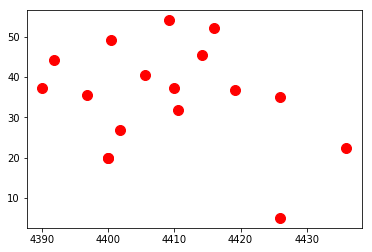

In [102]:
import matplotlib.pyplot as plt

def euclid(a,b):
    return sqrt((a.x-b.x)**2+(a.y-b.y)**2)

def cross(a,b):
    return a.x*b.y - a.y*b.x

def dot(a,b):
    return a.x*b.x + a.y*b.y

def vect(a,b):
    return P(b.x-a.x,b.y-a.y) 

class P(): #point
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def transform(self,x,y):
        self.x = self.x+x
        self.y = self.y+y
        
    def rotate(self,angle):
        x = self.x
        y = self.y
        self.x = x*cos(angle*pi/180)-y*sin(angle*pi/180)
        self.y = x*sin(angle*pi/180)+y*cos(angle*pi/180)
    
points = [P(0,0),P(0,20),P(30,20),P(30,0)]
point_zero = [4399.9999999999745, 20.000000000061846]

for p in points:
    p.rotate(30)
    p.transform(point_zero[0],point_zero[1])
p1 = [0 for i in range(9)]
v = P(0, 1)
v2 = vect(points[0], points[1])
angle = degrees(atan2(cross(v, v2), dot(v, v2)))
print(angle)
for i in range(3):
    for j in range(3):
        p1[i*3+j] = P(5 + 10*j,5+10*i)
        p1[i*3+j].rotate(angle)
        p1[i*3+j].transform(point_zero[0],point_zero[1])
print(p1)
t = [[4400, 20],[4410.0,37.32050807568877],[4435.980762113533,22.32050807568877],[4425.980762113533, 5.000000000000002]]
a =[]
#a=[[points[0].x,points[0].y],[points[1].x,points[1].y],[points[2].x,points[2].y],[points[3].x,points[3].y]]
for i in range(4):
    a.append(t[i])
for p in range(13):
    if p>3:
        a.append([p1[p-4].x,p1[p-4].y])
    else:
        a.append([points[p].x,points[p].y])
plt.plot(*zip(*a), marker='o', color='r',markersize=10, ls='')
plt.show()

In [41]:
import math

class P():
    def __init__(self,x,y):
        self.x = x
        self.y = y

class L():
    def __init__(self,p1,p2,p3):
        self.a = 2*(p2.x-p1.x)
        self.b = 2*(p2.y-p1.y)
        self.c = p1.x*p1.x - p2.x*p2.x +p1.y*p1.y - p2.y*p2.y - euclid(p1,p3)**2 + euclid(p2,p3)**2
        print(euclid(p1,p3) , euclid(p2,p3))
        
class O():
    def __init__(self,p1,p3):
        self.x = p1.x
        self.y = p1.y
        self.r = euclid(p1,p3)

def euclid(a,b):
    return math.sqrt((a.x-b.x)**2+(a.y-b.y)**2)
        
def get_angle_point(o, l):
    EPS = 0.000001
    print(o.x,o.y,o.r, l.a,l.b,l.c)
    l.c =  l.a * o.x + l.b*o.y + l.c
    x = -l.a * l.c / (l.a**2 + l.b**2)
    y = -l.b * l.c / (l.a**2 + l.b**2)
    
    if(abs(l.c*l.c - o.r*o.r*(l.a**2 + l.b**2)) < EPS):
        p1= [x,y]
        return p1,0
    else:
        d = o.r**2 - l.c*l.c / (l.a**2 + l.b**2)
        mult = math.sqrt (d / (l.a**2 + l.b**2))
        x1 = x + l.b * mult + o.x
        y1 = y - l.a * mult + o.y
        x2 = x - l.b * mult + o.x
        y2 = y + l.a * mult + o.y
        return [x1,y1],[x2,y2]
    
"""a = [-3648.7093262178223, 9310.58109103675]
b = [-3667.3231785695702, 9303.265056093285]
c = [400, 300]"""
#503.02242689006977 204.6181890292131 501.6224268900698 203.41818902921312

#с = 504.67430858519543 201.27432705157037  ; 499.97054519494793 206.76205100685914
#3.739881524371829
#5.3291874978118985

o = O(P(503.02242689006977, 204.6181890292131),P(505, 205))
l = L(P(501.6224268900698, 203.41818902921312),P(503.02242689006977, 204.6181890292131),P(505, 205))
print(get_angle_point(o,l))

3.7296281396709445 2.01409409475634
503.02242689006977 204.6181890292131 2.01409409475634 2.7999999999999545 2.3999999999999773 -1905.9999999999816
([504.99999999999903, 205.00000000000506], [503.70219832507684, 206.5141019540809])
